In [12]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons


In [13]:
x,y = make_moons(n_samples=1000,noise=0.20,random_state=42)

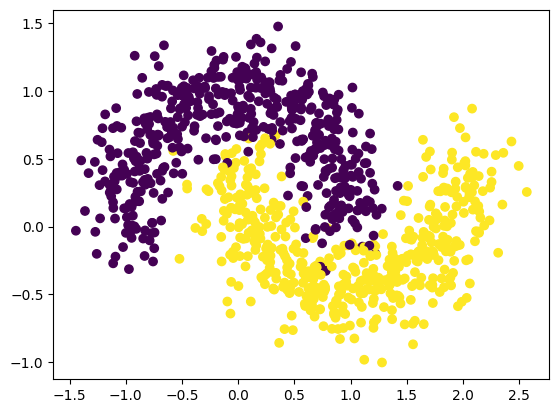

In [14]:
plt.scatter(x[:,0],x[:,1],c=y)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
x_train.shape,x_test.shape

((800, 2), (200, 2))

In [18]:
x_val,x_train = x_train[:200],x_train[200:]
y_val,y_train = y_train[:200],y_train[200:]


In [19]:
x_train.shape,x_test.shape

((600, 2), (200, 2))

In [23]:
y_train.shape,y_test.shape

((600,), (200,))

In [20]:
model1 = Sequential()

In [21]:
model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [22]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [25]:
history1 = model1.fit(x_train,y_train,validation_data=(x_val,y_val),validation_split=0.10,epochs=500,verbose=0)

In [27]:
model2 = Sequential()

model2.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=tensorflow.keras.regularizers.l2(0.3)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.3)))
model2.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history2 = model2.fit(x_train,y_train,validation_data=(x_val,y_val),validation_split=0.10,epochs=500,verbose=0)


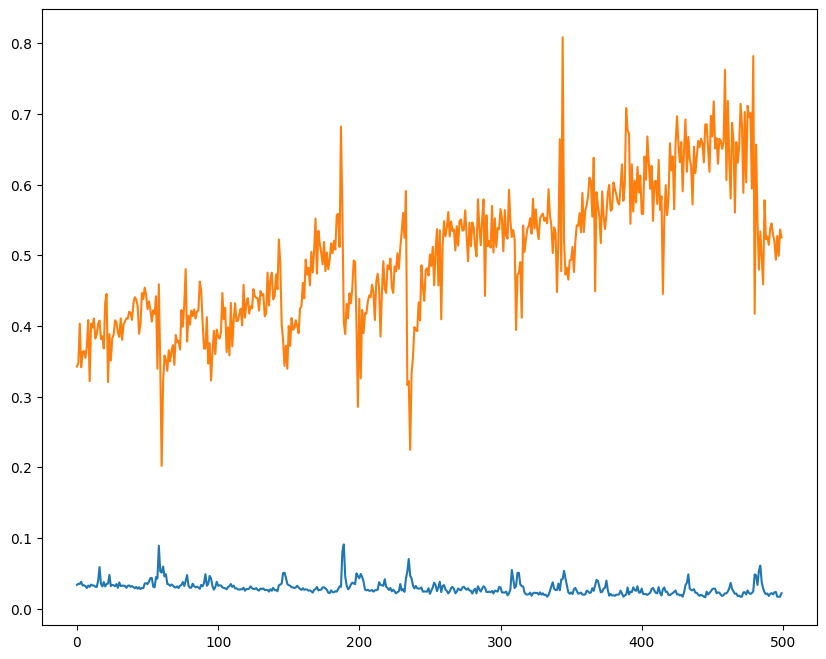

In [30]:
plt.figure(figsize=(10,8))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show()


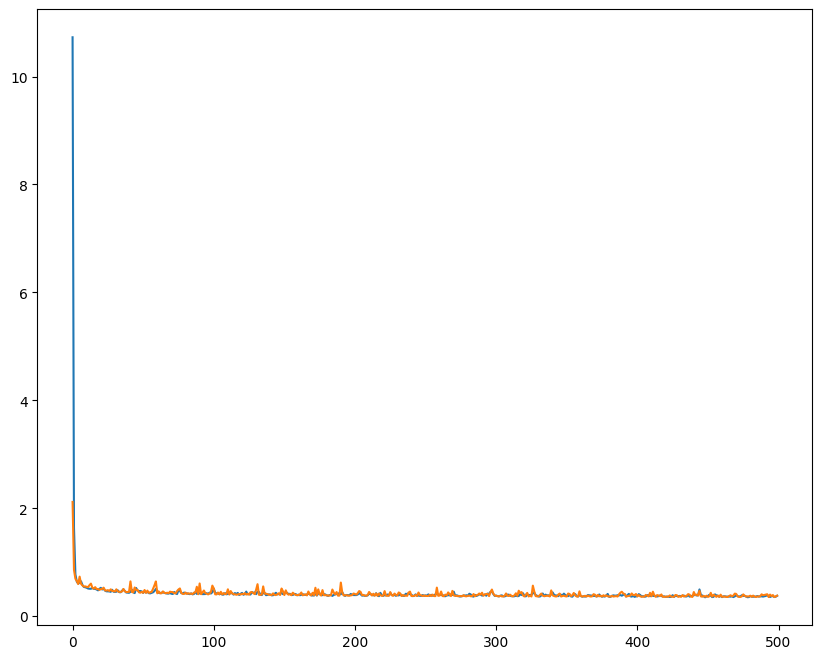

In [31]:
plt.figure(figsize=(10,8))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()

In [32]:
model1_layer = model1.get_weights()[0].reshape(256)

In [33]:
model2_layer = model2.get_weights()[0].reshape(256)

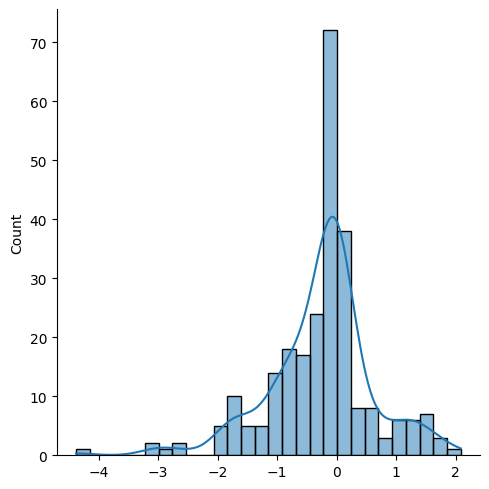

In [37]:
sns.displot(model1_layer,kde=True)


ValueError: Maximum allowed size exceeded

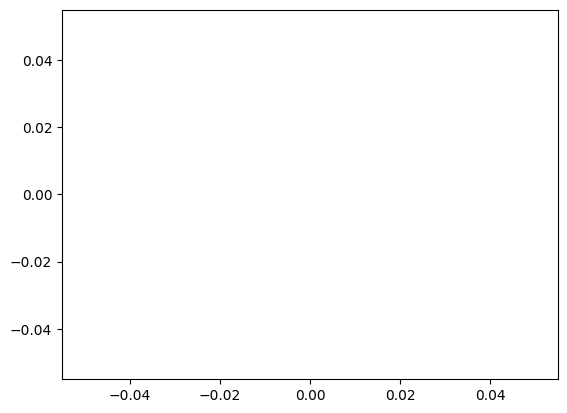

In [42]:
sns.histplot(model2_layer)

In [39]:
model2_layer

array([-1.10972005e-36,  9.19931591e-37,  4.24453977e-37,  1.13976676e-36,
        1.79711591e-36, -1.96655132e-36,  2.80447669e-37,  1.90412220e-36,
        1.12020974e-36, -1.19173022e-36, -1.22137192e-36, -1.13815488e-36,
        2.93410105e-37, -1.39900473e-36,  1.08571798e-01,  1.46250503e-36,
        1.04586460e-37, -3.90601656e-37, -1.20569675e-36,  1.46800296e-37,
       -1.12772483e-36,  1.47106690e-36, -1.23013091e-36, -6.18894117e-37,
        8.67647418e-37, -6.73399919e-37, -2.10832417e-37, -3.87502746e-37,
       -1.65500909e-36,  1.70496365e-36, -3.30086189e-37, -1.24464935e-36,
        1.22853007e-36, -9.90024315e-37, -1.08450421e-36,  2.13165074e-36,
        9.64097290e-37, -1.11430501e-36,  4.81440414e-37,  1.97914104e-36,
        1.03549544e-37,  8.34282076e-37,  2.10433076e-36,  8.92314576e-38,
        1.03391666e-36, -2.47136838e-13,  1.23745022e-36,  3.70668510e-37,
       -1.11460132e-36,  1.13425806e-36,  6.35094113e-37, -9.25865383e-37,
        5.85742579e-37,  

In [41]:
model1_layer

array([-1.59136724e+00, -1.52540398e+00, -2.48135738e-02, -6.64115101e-02,
       -1.18067041e-01, -6.67730197e-02, -6.32461067e-03, -1.90258436e-02,
       -1.82397544e+00,  6.24230385e-01,  4.04267572e-03,  6.39183342e-01,
       -1.68560493e+00,  1.68265011e-02, -1.00156391e+00, -2.14586034e-02,
       -3.87858637e-02, -1.42762673e+00, -4.40362655e-02,  3.34175155e-02,
       -2.27497406e-02, -1.71107888e-01, -9.54650462e-01, -5.93957193e-02,
       -2.77374871e-02,  1.21233487e+00, -6.50956392e-01, -5.75386345e-01,
        2.20428463e-02,  7.69812763e-02, -3.07293646e-02,  1.47330180e-01,
       -1.44178234e-02, -1.94645548e+00, -8.66816044e-01, -3.37406248e-01,
        1.18981667e-01, -7.14315847e-02, -6.71236873e-01, -8.14147759e-03,
       -7.21873999e-01,  9.24696848e-02,  8.33684266e-01, -9.63709205e-02,
       -4.93637137e-02, -1.69859672e+00,  1.65254548e-02, -3.83995354e-01,
       -8.20331395e-01, -8.61286223e-01, -9.45396814e-03, -6.27497397e-03,
       -8.73744369e-01, -

<Axes: >

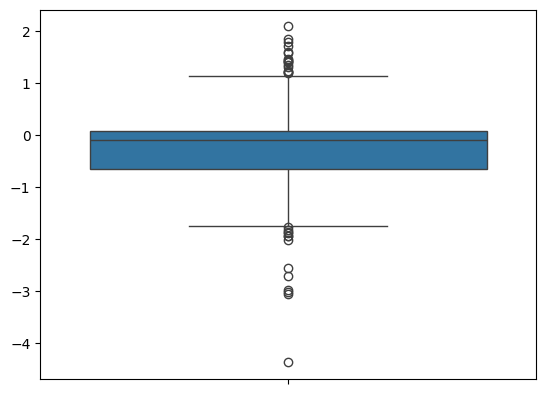

In [43]:
sns.boxplot(model1_layer)

<Axes: >

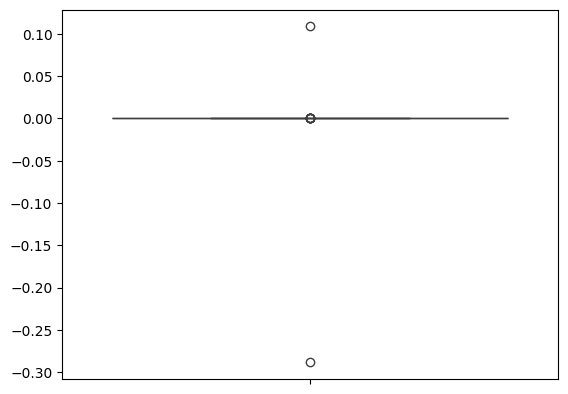

In [44]:
sns.boxplot(model2_layer)

In [45]:
model2_layer.min()

-0.28839883

In [46]:
model1_layer.min()

-4.377124